In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [31]:
data = pd.read_csv("dataset/Churn_Modelling.csv")

In [32]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Preprocess the data

In [33]:
# drop irrelevant columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
# encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [35]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data['Geography'].values.reshape(-1,1))
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [36]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [37]:
pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [38]:
# combine one hot encoded columns with original data
data = data.drop(['Geography'],axis=1)
data = pd.concat([data,pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))],axis=1)

In [39]:
# save the encoder and scaler
with open('label_encoder_geo.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)
with open('onehot_encoder_geo.pkl','wb')   as f:
    pickle.dump(onehot_encoder_geo,f)

In [40]:
# divide the dataset into independent and dependent features
X = data.drop(['Exited'],axis=1)
y = data['Exited']
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

ANN IMPLEMENTATION


if we want to create hidden layers, we use dense
![WhatsApp Image 2025-03-31 at 11.05.55_f2f356c9.jpg](<attachment:WhatsApp Image 2025-03-31 at 11.05.55_f2f356c9.jpg>) 
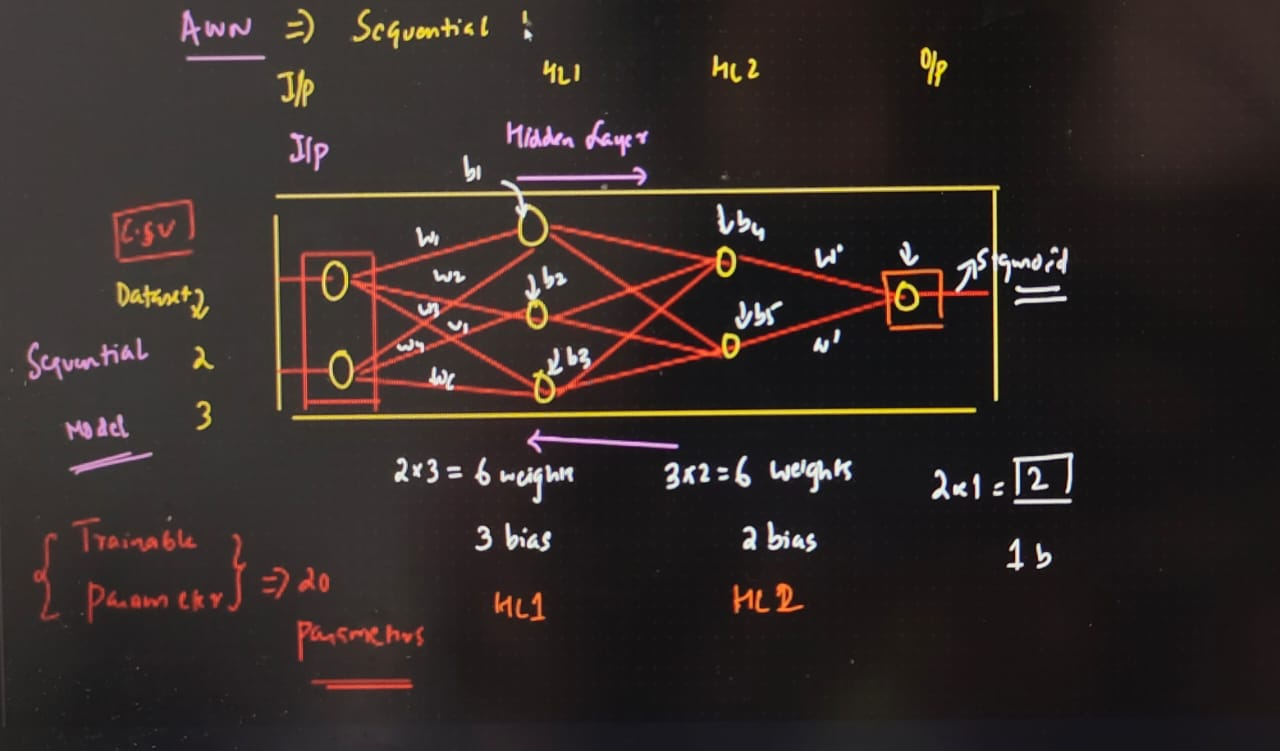

![WhatsApp Image 2025-03-31 at 11.07.55_d1f3af71.jpg](<attachment:WhatsApp Image 2025-03-31 at 11.07.55_d1f3af71.jpg>)
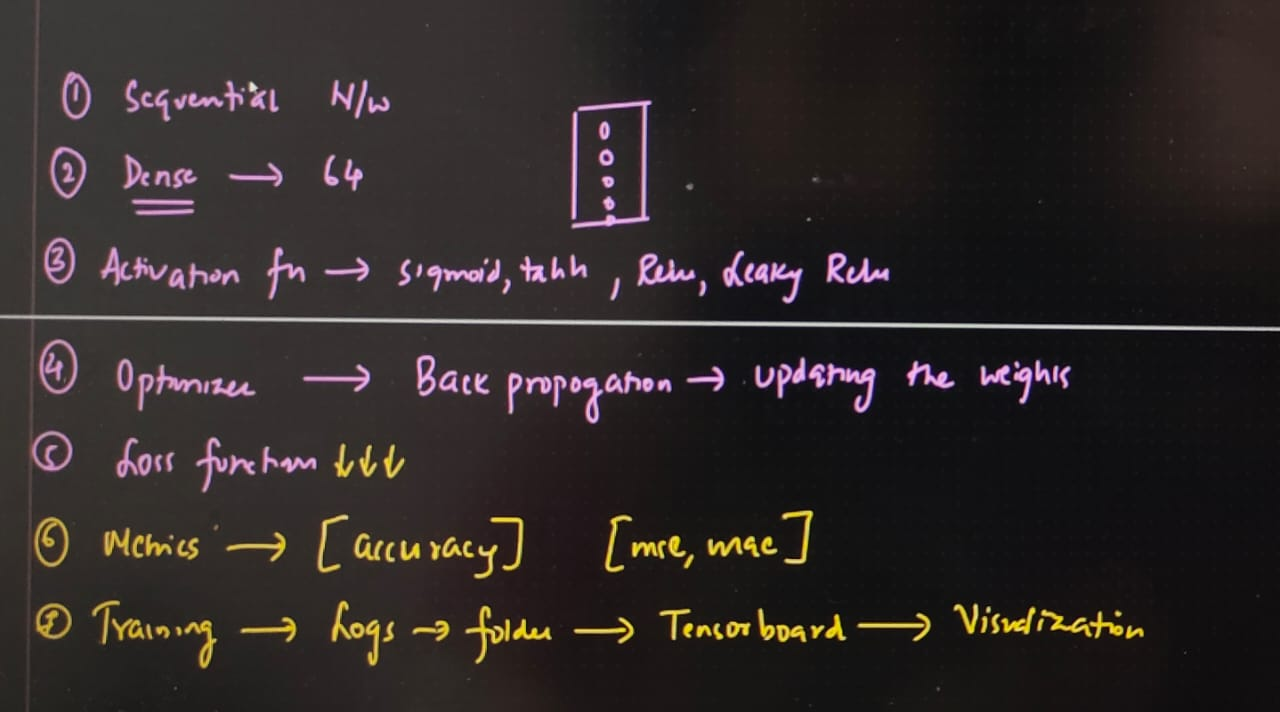

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [43]:
(X_train.shape[1],)

(12,)

In [44]:
# build ann model
model = Sequential([
    # hl1
    # input_shape=(X_train.shape[1],): The input layer takes a feature vector of size equal to the number of columns in X_train.
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    # hl2
    Dense(32,activation='relu'),
    # op layer
    Dense(1,activation='sigmoid')]

)

c:\Users\Rajeev Pandey\.virtualenvs\LoyaltyLens-YKD759Qs\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x00000196B2CD0FE0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [47]:
# compile the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
# set up the tensorboard
# whenever we train our model it will store the logs here
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [49]:
# set up early stopping, we monitor validation loss and if it does not improve for 5 epochs we stop training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [50]:
# train the model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=100, 
    callbacks=[early_stopping, tensorflow_callback]
)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8150 - loss: 0.4322 - val_accuracy: 0.8510 - val_loss: 0.3589
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8514 - loss: 0.3599 - val_accuracy: 0.8575 - val_loss: 0.3466
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8494 - loss: 0.3665 - val_accuracy: 0.8575 - val_loss: 0.3538
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8626 - loss: 0.3380 - val_accuracy: 0.8555 - val_loss: 0.3553
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8623 - loss: 0.3370 - val_accuracy: 0.8565 - val_loss: 0.3483
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8575 - loss: 0.3437 - val_accuracy: 0.8560 - val_loss: 0.3556
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8666 - loss: 0.3288 - val_accuracy: 0.8555 - val_loss: 0.3557
